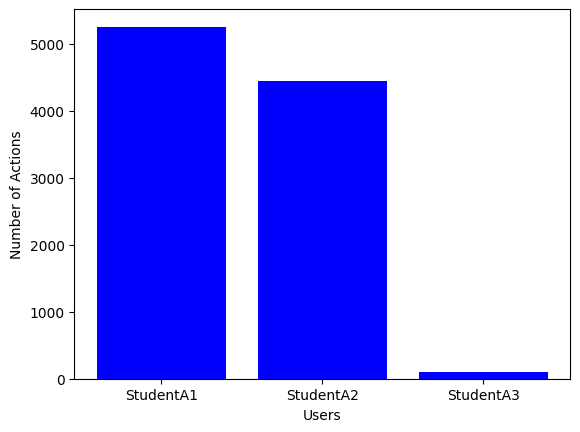

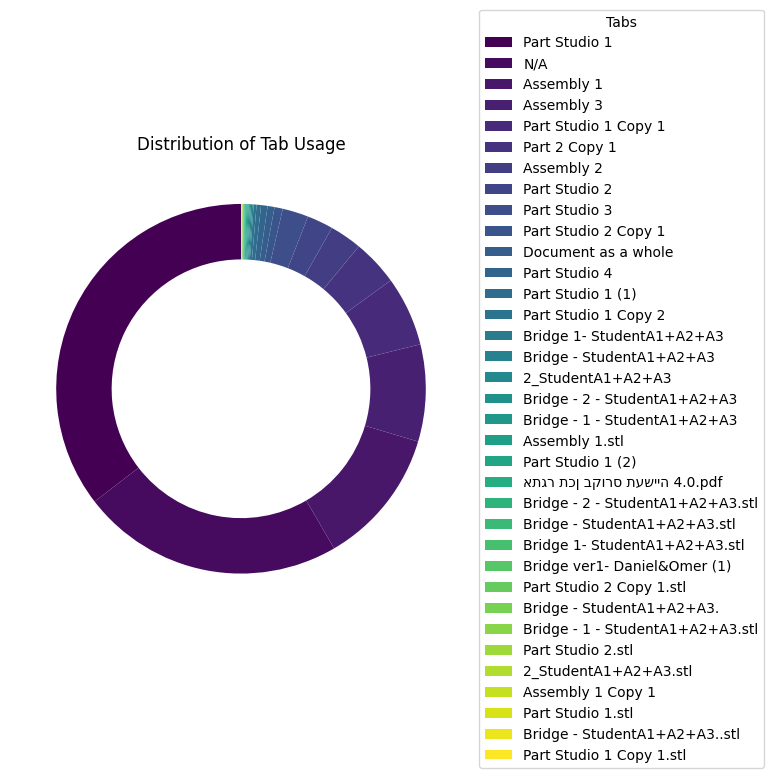

Dropdown(description='Select User:', options=('StudentA1', 'StudentA2', 'StudentA3'), value='StudentA1')

Output()

In [20]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

df = pd.read_json('/content/drive/MyDrive/jsonFile.json')

 ## Choose User ##
user_dropdown = widgets.Dropdown(
    options=df['User'].unique(),
    description='Select User:',
    disabled=False,
)
 ## Number of Actions of each user ##
user_counts = df["User"].value_counts()
x = user_counts.index.tolist()
y = user_counts.values.tolist()
fig = plt.figure()
plt.bar(x,y, color='blue')
plt.xlabel('Users')
plt.ylabel('Number of Actions')
plt.show()

 ## Distribution of Tab Usage ##
tab_counts = df["Tab"].value_counts()
labels = tab_counts.index.tolist()
sizes = tab_counts.values.tolist()
colors = plt.get_cmap()(np.linspace(0, 1, len(labels))) ## add color map
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts = ax.pie(
    sizes,
    labels=None,  # remove labels to imporve readability
    startangle=90,  # rotate the start angle
    wedgeprops=dict(width=0.3),  # turn to donut
    colors=colors
)
# add labels names on the side of the pie chart
ax.legend(wedges, labels, title="Tabs", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Tab Usage')
plt.show()

def on_user_change(user):
  user_df = df[df['User'] == user].copy()
  ## trends over time ##
  user_df["Time"] = pd.to_datetime(user_df["Time"])
  date_counts = user_df["Time"].dt.date.value_counts().sort_index()
  plt.figure(figsize=(10, 5))
  plt.plot(date_counts.index, date_counts.values, marker='o', linestyle='-')
  plt.xlabel('Date')
  plt.ylabel('Number of Actions')
  plt.title('Actions Over Time For: ' + user)
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

  ## Distribution of ACtions Throughout the Day ##
  user_df['hour'] = user_df["Time"].dt.hour
  plt.figure(figsize=(10, 5))
  plt.hist(user_df['hour'], bins=24, range=(0, 24), color='blue', alpha=0.7)
  plt.xlabel('Hour of the Day')
  plt.ylabel('Number of Actions')
  plt.title('Distribution of Actions Throughout the Day For: ' + user)
  plt.grid(True)
  plt.show()


output = widgets.interactive_output(on_user_change, {'user': user_dropdown})
display(user_dropdown, output)
